In [1]:
import os
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
# Load your predictions
results_path = '/srv/scratch/z5370003/projects/results/04_groundwater/variable_density/GINO_predictions/multi_col/mass_conc_head/exp_lr5e4_exp_bs512_win5_out1/latest_checkpoint.pth/run_20251202_160221'
train_pred = np.load(os.path.join(results_path, 'train_predictions.npy'))
train_targ = np.load(os.path.join(results_path, 'train_targets.npy'))

train_coords = pickle.load(open(os.path.join(results_path, 'train_coords.pkl'), 'rb'))

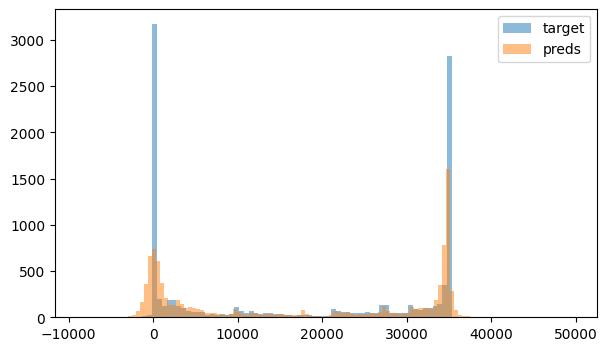

In [3]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(train_targ[0, :, 0, 0], bins=100, label='target', alpha=0.5)
ax.hist(train_pred[0, :, 0, 0], bins=100, label='preds', alpha=0.5)
ax.legend()

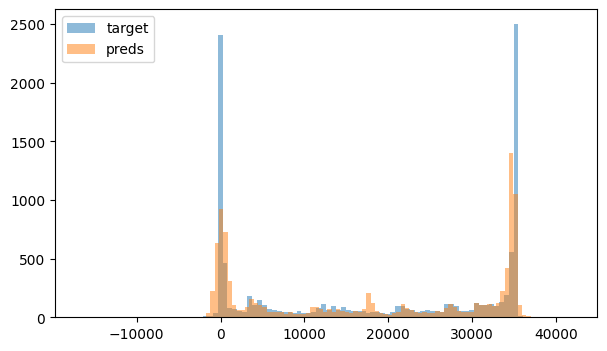

In [4]:
fig, ax = plt.subplots(figsize=(7, 4))
ax.hist(train_targ[-1, :, 0, 0], bins=100, label='target', alpha=0.5)
ax.hist(train_pred[-1, :, 0, 0], bins=100, label='preds', alpha=0.5)
ax.legend()

In [5]:
train_node_coords = train_coords[0]
variance_train = np.var(train_targ[...,0], axis=(0, 2))
train_node_coords.shape, variance_train.shape

((10227, 3), (10227,))

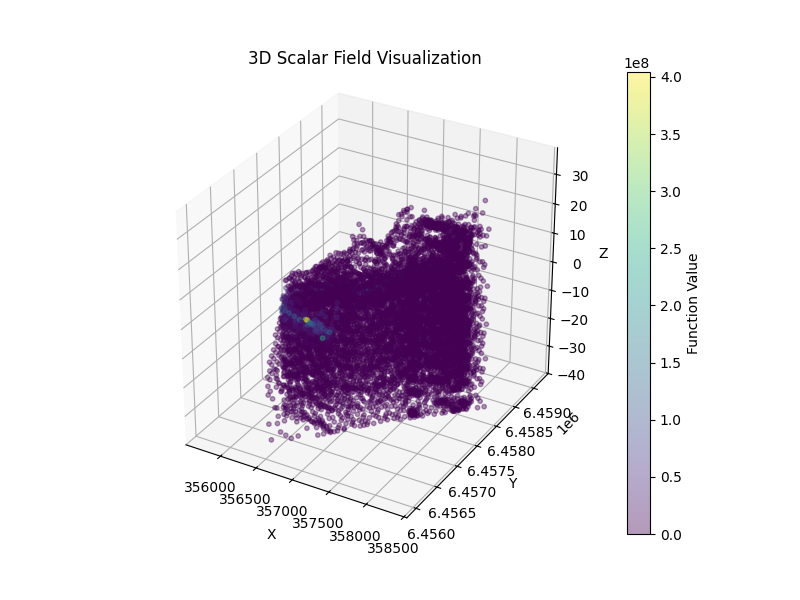

In [7]:
%matplotlib widget

# 2. Setup the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

# 3. Create the 3D scatter plot
# x=coords[:,0], y=coords[:,1], z=coords[:,2]
# c=values maps the function values to colors
# s=1 reduces point size to prevent overcrowding (useful for 10k+ points)
p = ax.scatter(train_node_coords[:, 0], train_node_coords[:, 1], train_node_coords[:, 2], c=variance_train, cmap='viridis', s=10, alpha=0.4)

# --- THE FIX: Vertical Exaggeration ---
x_range = np.ptp(train_node_coords[:, 0])
y_range = np.ptp(train_node_coords[:, 1])
z_range = np.ptp(train_node_coords[:, 2])

# Multiplier to stretch the Z-axis visually
# Try 3, 5, or 10 depending on how flat the terrain is
vertical_exaggeration = 40 

ax.set_box_aspect((x_range, y_range, z_range * vertical_exaggeration))
# --------------------------------------

# 4. Add colorbar and labels
fig.colorbar(p, ax=ax, label='Function Value')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scalar Field Visualization')

plt.show()

In [21]:
min_val_train = np.min(train_targ[...,0], axis=(0, 2))
index = np.arange(len(min_val_train))

negindex = index[min_val_train<0]
posindex = index[min_val_train>=0]

In [23]:
negindex.shape, posindex.shape

((544,), (9683,))

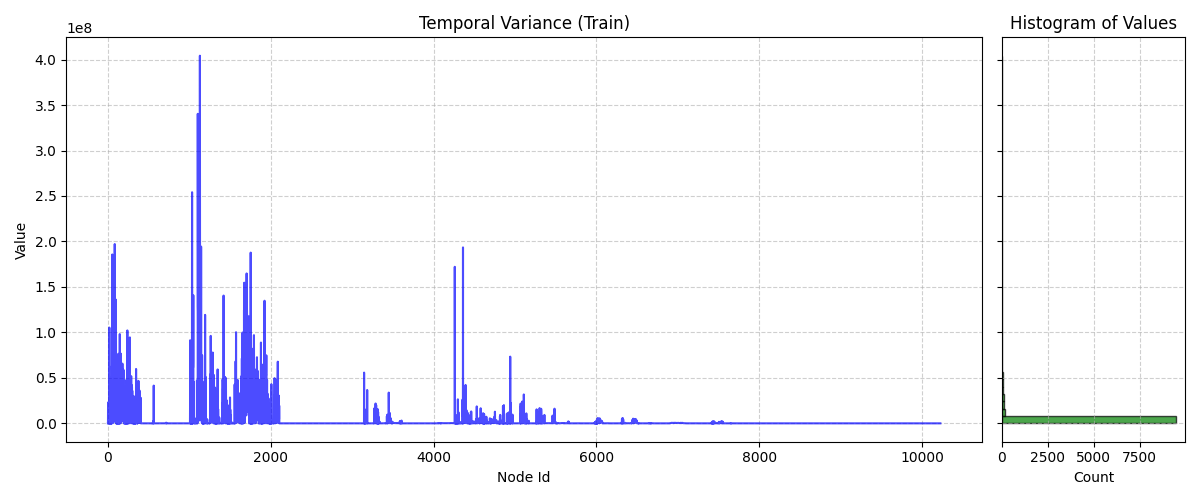

In [25]:
# 2. Create a figure with 2 subplots side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [5, 1]})

# 3. Plot the trace on the left
ax1.plot(variance_train, color='blue', alpha=0.7)
ax1.set_title('Temporal Variance (Train)')
ax1.set_xlabel('Node Id')
ax1.set_ylabel('Value')
ax1.grid(True, linestyle='--', alpha=0.6)

# 4. Plot the histogram on the right
# orientation='horizontal' aligns the histogram's Y-axis with the trace's Y-axis
ax2.hist(variance_train, bins=50, color='green', alpha=0.7, edgecolor='black', orientation='horizontal')
ax2.set_title('Histogram of Values')
ax2.set_xlabel('Count')
# Hide Y-axis labels on the histogram since they match the trace
ax2.set_yticklabels([])
ax2.grid(True, linestyle='--', alpha=0.6)

# 5. Adjust layout
plt.tight_layout()
plt.show()

In [34]:
# Check value ranges per column
for col_idx, col_name in enumerate(['mass_concentration', 'head']):
    pred_col = train_pred[:, :, :, col_idx]
    targ_col = train_targ[:, :, :, col_idx]
    
    print(f"\n{col_name}:")
    print(f"  Target range: [{targ_col.min():.2f}, {targ_col.max():.2f}]")
    print(f"  Pred range: [{pred_col.min():.2f}, {pred_col.max():.2f}]")
    print(f"  Target std: {targ_col.std():.4f}")
    print(f"  MAE: {np.abs(pred_col - targ_col).mean():.4f}")
    print(f"  Relative MAE: {np.abs(pred_col - targ_col).mean() / targ_col.std():.4f}")


mass_concentration:
  Target range: [-23419.27, 71359.75]
  Pred range: [-28134.59, 68835.59]
  Target std: 15196.0767
  MAE: 832.8983
  Relative MAE: 0.0548

head:
  Target range: [-0.65, 1.79]
  Pred range: [-0.48, 2.01]
  Target std: 0.2174
  MAE: 0.0330
  Relative MAE: 0.1517
